In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, metrics
from sklearn.model_selection import train_test_split

import imblearn

In [2]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

# Présentations du projet

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser",  qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.



L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 


# Présentation des données

application_{train|test}.csv
Table principal séparé en deux fichier contenant les fichier de Train(avec TARGET) et Test(sans TARGET)
This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
bureau.csv
Pour tout les clients : crédits précedent qui ont été raporté au bureau de credits par d'autre institution
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

bureau_balance.csv
Solde mentuelles des précedents crédits
Monthly balances of previous credits in Credit Bureau.

POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.

installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

# Traitement des données

Pour le prétraitement des données nous utilisons un Kernel Kaggle : https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script

Ce Kernel applique le traitement suivant sur les données :

- Onehotencoding pour les variables catégorielles

Pour les variables numériques le traitement dépendra du dataframe

- Application : Création de nouvelle variables notament par division entre colonnes

- Autres dataframes : Extraction des principals valeurs statistique pour chaques variables : max,min,mean,var,sum



In [3]:


df=pd.read_csv('..\Preprocessing\df_prepro.csv')

In [4]:
df.head()

,Unnamed: 0,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,0,100002,1.0,0,0,0,0,202500.0,406597.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,100004,0.0,0,1,0,0,67500.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,100006,0.0,1,0,0,0,135000.0,312682.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,4,100007,0.0,0,0,0,0,121500.0,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On retire les clients qui n'ont pas de valeurs TARGET

In [5]:

df = df[df['TARGET'].notnull()]
df.shape

(307507, 799)

On retire les variables qui possèdent plus de 80% de NaN

In [6]:
df=df.dropna(1,thresh=0.8*len(df))
df

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2600753947.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df=df.dropna(1,thresh=0.8*len(df))


,Unnamed: 0,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,0,0,100002,1.0,0,0,0,0,202500.0,406597.5,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
1,1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,...,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
2,2,2,100004,0.0,0,1,0,0,67500.0,135000.0,...,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
3,3,3,100006,0.0,1,0,0,0,135000.0,312682.5,...,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
4,4,4,100007,0.0,0,0,0,0,121500.0,513000.0,...,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,307506,307506,456251,0.0,0,0,1,0,157500.0,254700.0,...,7492.924286,52450.470,6605.910,12815.010,7492.924286,52450.470,-38.0,-156.285714,-1094.0,7.0
307503,307507,307507,456252,0.0,1,0,0,0,72000.0,269550.0,...,10069.867500,60419.205,10046.880,10074.465,10069.867500,60419.205,-2327.0,-2393.833333,-14363.0,6.0
307504,307508,307508,456253,0.0,1,0,0,0,153000.0,677664.0,...,4399.707857,61595.910,27.270,5575.185,4115.915357,57622.815,-1738.0,-2387.428571,-33424.0,14.0
307505,307509,307509,456254,1.0,1,0,0,0,171000.0,370107.0,...,10239.832895,194556.825,2296.440,19065.825,10239.832895,194556.825,-18.0,-161.263158,-3064.0,19.0


On impute les valeurs NaN restantes par la mediane de chaque colonne

In [9]:
mediane_df=pd.DataFrame()
for col in df.columns:
    vmedian=df[col].median()
    df[col] = df[col].fillna(vmedian)
    mediane_df[col]=[vmedian]
#     df.query('TARGET==0')[col][np.isfinite(df[col])==False]=med_0
#     df.query('TARGET==1')[col][np.isfinite(df[col])==False]=med_1
    




C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mediane_df[col]=[vmedian]
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\607403120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

In [13]:
for col in df.columns:

    if (np.isfinite(df[col])==False).sum():
        print(col)





PREV_APP_CREDIT_PERC_MAX
INSTAL_PAYMENT_PERC_MAX


In [14]:
for col in df.columns:
    vmedian=df[col][np.isfinite(df[col])].median()
    df[col][np.isfinite(df[col])==False]=vmedian
    

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfinite(df[col])==False]=vmedian
C:\Users\pon\AppData\Local\Temp\ipykernel_11528\2761683161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][np.isfin

# Selection du modèle

Nous effectuerons notre selection sur quatres types de modèles
- DecisionTreeClassifier
- RandomForestClassifier
- Xgboost
- LGBM

Chaque modèle sera entrainé avec une BayesSearchCv sur deux set de features:
- Un ou un oversampling avec smote est utilisé
- Le second sans utilisé smote au préalable et en utilisant le paramètre class weight


La metrique est utilisée pour l'entrainement est le score auc qui correspond a l'air se trouvant sous la courbe roc

Puis nous utiliserons la fonction cout_metier pour determiner la classe prédité en fonction des probabilités donné par le model



Pour notre notre fonction cout metier nous voulons en priorité reduire le nombre de clients de la classe 1 prédit dans la classe 0(Faut négatifs), cela correspond a maximiser le recall score du modele

Cependant les Faux negatifs répresente aussi une perte et ne doivent pas etre ignoré, on ne peut donc pas négligé le precision score

Une famille de métrique permettant d'optimiser le recall et la précision tout en maximisant l'importance de l'un est la famille des F_beta score (Beta>1) , cependant pour determiner ce parametre Beta il faudrait calculer le rapport entre les pertes moyennes engendré par les faux positifs et faux négatifs ce que les données ne permettent pas.

On choisira donc un coefficient Beta=2 pour la suite du notebook, qui donne légerement plus d'importance au recall score.

Séparation des données en un train et un test set

In [15]:
X=df.drop(['TARGET','SK_ID_CURR','index','Unnamed: 0'],1).copy()
y=df['TARGET'].copy()


C:\Users\pon\AppData\Local\Temp\ipykernel_11528\177233720.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop(['TARGET','SK_ID_CURR','index','Unnamed: 0'],1).copy()


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from collections import Counter


On crée un deuxieme jeu d'entrainement en appliquant un oversampling avec SMOTE() sur notre X_train

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape %s' % Counter(Y_train))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,Y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 226201, 1.0: 19804})
Resampled dataset shape Counter({1.0: 226201, 0.0: 226201})


## Fonctions

In [19]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV
from imblearn.pipeline import Pipeline
from skopt import BayesSearchCV

from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score,RocCurveDisplay,recall_score,precision_score


In [20]:
#Créer un hashable dict qui sera utilisé pour le paramètre class_weight
class HashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

In [21]:

#Creer la pipeline du modèle
def grid_pipe(model,param,niter=50):
    params = param
    grid_model =  BayesSearchCV(estimator= model,
                       search_spaces=param,
                       n_iter=niter,
                       cv=5,
                       scoring='roc_auc',
                       n_jobs=1,
                       refit=True,
                       return_train_score=True,
                       verbose=2)
    return grid_model

In [22]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
             }




In [23]:
#Affiche les résultat pour un threshold donné
def metrique_plot(model,tresh):  
    temp = pd.DataFrame.from_dict(model.cv_results_)
    best_params=model.best_params_
    result=temp[temp['params']==best_params]
    
        
   

    col_roc_train = ['split'+i+'_train_score' for i in '01']
    col_roc_test=['split'+i+'_test_score' for i in '01']
    results=pd.DataFrame(columns=['roc_train','roc_test','f1_train','f1_test'])
    results['roc_train']=result[col_roc_train].iloc[0, :].values.flatten().tolist()
    results['roc_test']=result[col_roc_test].iloc[0, :].values.flatten().tolist()
    plt.figure()
    results.boxplot()
    

    
    w=lambda x : 0 if x < (tresh/100) else 1
    y_pred=np.array([w(xi) for xi in model.predict_proba(X_test)[:,1]])
    score_f1=fbeta_score(Y_test,y_pred,beta=2)
    score_auc=roc_auc_score(Y_test,y_pred,average='macro')
    
    print("Le score F1 sur le validation set est : " , score_f1)
    print("Le score roc_auc sur le validation set est : " , score_auc)
    
    metrics.confusion_matrix(Y_test,y_pred )

    conf_mat = metrics.confusion_matrix(Y_test,y_pred )
    print(conf_mat)
    print()
    print(metrics.classification_report(Y_test, y_pred))


    df_cm = pd.DataFrame(conf_mat, index = [label for label in set(Y_test)],
                      columns = [i for i in "01"])
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')

In [24]:
#Selectionne le meilleur threshold pour le f_beta score et affiche les résultats
def best_threshold(model):
    best_thresh=0
    best_thresh_value=0

    for item in range(tresh_min,tresh_max):
        w = lambda x : 0 if x < (item/100) else 1
        y_pred=np.array([w(xi) for xi in model.predict_proba(X_test)[:,1]])
        score_f1=fbeta_score(Y_test,y_pred,beta=2)
        if score_f1 > best_thresh_value:
            best_thresh=item
            best_thresh_value=score_f1
            
            
    w=lambda x : 0 if x < (best_thresh/100) else 1
    y_pred=np.array([w(xi) for xi in model.predict_proba(X_test)[:,1]])
    score_f1=fbeta_score(Y_test,y_pred,beta=2)
    score_auc=roc_auc_score(Y_test,y_pred,average='macro')
    score_rec=recall_score(Y_test,y_pred)
    score_prec=precision_score(Y_test,y_pred)
    print('Le meilleur treshold pour ce modèle est :', best_thresh)
    print("Le reccall score sur le validation set est : " , score_rec)
    print("Le precision score sur le validation set est : " , score_prec)
    print("Le score F1 sur le validation set est : " , score_f1)
    print("Le score roc_auc sur le validation set est : " , score_auc)
    
    metrics.confusion_matrix(Y_test,y_pred )

    conf_mat = metrics.confusion_matrix(Y_test,y_pred )
    print(conf_mat)
    print()
    print(metrics.classification_report(Y_test, y_pred))


    df_cm = pd.DataFrame(conf_mat, index = [label for label in set(Y_test)],
                      columns = [i for i in "01"])
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')
    

# Decision Tree

## Class_weight

In [20]:

from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree_param = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2 ,3 ,4 ,5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'min_samples_leaf': [1, 2],
              'class_weight' : [HashableDict({0: w}) for w in [0, 0.1, 0.2, 0.4, 0.6, 1]]}
tree_model=DecisionTreeClassifier()
gcv = grid_pipe(tree_model,tree_param)
gcv_train = gcv.fit(X_train,Y_train)
gcv_train.score(X_test,Y_test)
#plot_search_results(gcv_train, title="Decision Tree")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2; total time=   1.7s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2; total time=   1.6s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2; total time=   1.7s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2; total time=   1.7s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2; total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.01, class_weight={0: 0.2}, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1; total time=   2.0s
[CV] END ccp_alpha=0.01, class_weight={0: 0.2}, crit

[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2; total time=   1.1s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2; total time=   1.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2; total time=   1.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2; total time=   1.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.1, class_weight={0: 0.4}, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2; total time=   1.8s
[CV] END ccp_alpha=0.1, class_weight={0: 0.4}, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   2.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0}, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   1.0s
[CV] END ccp_alpha=0.001, class_weight={0: 0}, cri

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.6s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1},

[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.6s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.8s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2; total time=   1.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2},

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.6s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.2s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.2}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   2.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.2},

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.2s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.5s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.1}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   2.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4},

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   2.3s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   2.4s
[CV] END ccp_alpha=0.001, class_weight={0: 0.4}, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   2.4s


0.6352720020646909

Les meilleur paramètres pour le modèle sont :
ccp_alpha 0.001
class_weight {0: 0.2}
criterion entropy
max_depth 9
max_features sqrt
min_samples_leaf 1


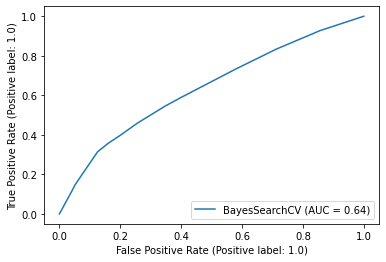

In [22]:
print('Les meilleur paramètres pour le modèle sont :')
for keys in gcv_train.best_params_:
    print(keys,gcv_train.best_params_[keys])
RocCurveDisplay.from_estimator(gcv_train, X_test, Y_test)

In [23]:
tresh_min=round((gcv_train.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((gcv_train.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(gcv_train))


interactive(children=(IntSlider(value=36, description='tresh', max=54, min=19), Output()), _dom_classes=('widg…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 25
Le reccall score sur le validation set est :  0.7325234017128062
Le precision score sur le validation set est :  0.10113008331271138
Le score F1 sur le validation set est :  0.3257577099534126
Le score roc_auc sur le validation set est :  0.5768634961503958
[[23790 32691]
 [ 1343  3678]]

              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58     56481
         1.0       0.10      0.73      0.18      5021

    accuracy                           0.45     61502
   macro avg       0.52      0.58      0.38     61502
weighted avg       0.88      0.45      0.55     61502



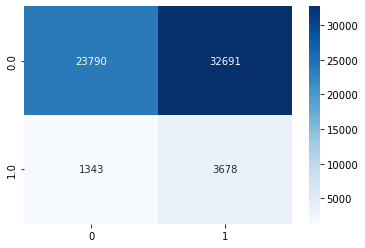

In [24]:
best_threshold(gcv_train)

## SMOTE

In [25]:
del tree_param['class_weight']
gcv_res = grid_pipe(tree_model,tree_param)
gcv_train_res = gcv_res.fit(X_res,y_res)
print(gcv_train_res.score(X_test,Y_test))
#plot_search_results(gcv_train_res, title="Decision Tree")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1; total time=   4.4s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1; total time=   2.8s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1; total time=   2.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1; total time=   2.8s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1; total time=   2.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.01, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1; total time=   2.8s
[CV] END ccp_alpha=0.01, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1; total time=   2.8s
[CV] END ccp_alpha=0.01, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1; t

[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2; total time=   2.7s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2; total time=   2.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2; total time=   2.7s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2; total time=   2.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2; total time=   2.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.5s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.7s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.7s
[CV] END ccp_alpha=0.0

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.3s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.3s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.4s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.2s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.2s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.4s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.4s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.1s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.4s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.3s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.5s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.3s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   3.9s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.4s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.4s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   5.1s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.6s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2; total time=   2.3s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2; total time=   2.3s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=2, max_features=sqrt,

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.7s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.3s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.7s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2; total time=   4.4s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.3s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2; total time=   5.1s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.4s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.3s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.4s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.6s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.7s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2; total time=   3.5s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2; total time=   3.2s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, min_s

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt,

C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1; total time=   5.0s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   6.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.2s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.3s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.7s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.6s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.9s


C:\Users\pon\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.6s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   4.8s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2; total time=   5.0s
0.5910333043207869


ccp_alpha 0.001
criterion entropy
max_depth 9
max_features sqrt
min_samples_leaf 2


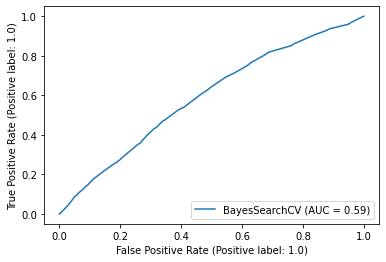

In [26]:
for keys in gcv_train_res.best_params_:
    print(keys,gcv_train_res.best_params_[keys])
RocCurveDisplay.from_estimator(gcv_train_res, X_test, Y_test)

In [27]:
tresh_min=round((gcv_train_res.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((gcv_train_res.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(gcv_train_res))


interactive(children=(IntSlider(value=53, description='tresh', max=98, min=9), Output()), _dom_classes=('widge…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 15
Le reccall score sur le validation set est :  0.8183628759211312
Le precision score sur le validation set est :  0.09566047399543698
Le score F1 sur le validation set est :  0.3259145277451696
Le score roc_auc sur le validation set est :  0.5653047360608117
[[17636 38845]
 [  912  4109]]

              precision    recall  f1-score   support

         0.0       0.95      0.31      0.47     56481
         1.0       0.10      0.82      0.17      5021

    accuracy                           0.35     61502
   macro avg       0.52      0.57      0.32     61502
weighted avg       0.88      0.35      0.45     61502



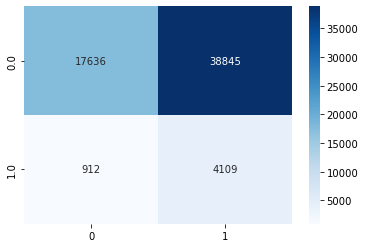

In [28]:
best_threshold(gcv_train_res)

# Random Forest

## Class_weight

In [29]:
from sklearn.ensemble import RandomForestClassifier

param_rfr = {'max_features' : ['sqrt', 'log2'],
             'max_depth': [5, 15, 25, 50],
             'min_samples_split': [2, 5, 10],
             'bootstrap' : [True, False],
             'min_samples_leaf': [1,2,5,10],
             'class_weight' : [HashableDict({0: w}) for w in [0, 0.1, 0.2, 0.4, 0.6, 1]]}



model_rfr=RandomForestClassifier()
rfr=grid_pipe(model_rfr,param_rfr,niter=25)
rfr_train=rfr.fit(X_train,Y_train)
rfr_train.score(X_test,Y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, class_weight={0: 1}, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 2.9min
[CV] END bootstrap=False, class_weight={0: 1}, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.0min
[CV] END bootstrap=False, class_weight={0: 1}, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.1min
[CV] END bootstrap=False, class_weight={0: 1}, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.1min
[CV] END bootstrap=False, class_weight={0: 1}, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, class_weight={0: 0.4}, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time= 1.0min
[CV] END bootstrap=False, class_weig

[CV] END bootstrap=False, class_weight={0: 0.2}, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time= 2.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, class_weight={0: 0.2}, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.3min
[CV] END bootstrap=False, class_weight={0: 0.2}, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.3min
[CV] END bootstrap=False, class_weight={0: 0.2}, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.3min
[CV] END bootstrap=False, class_weight={0: 0.2}, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.3min
[CV] END bootstrap=False, class_weight={0: 0.2}, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time= 3.3min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, 

[CV] END bootstrap=True, class_weight={0: 0.2}, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time= 1.8min
[CV] END bootstrap=True, class_weight={0: 0.2}, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time= 1.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, class_weight={0: 0.4}, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time= 4.0min
[CV] END bootstrap=False, class_weight={0: 0.4}, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time= 4.1min
[CV] END bootstrap=False, class_weight={0: 0.4}, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time= 4.1min
[CV] END bootstrap=False, class_weight={0: 0.4}, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time= 4.4min
[CV] END bootstrap=False, class_weight={0: 0.4}, max_depth=50, max_features=sqrt, min_sampl

0.7484637432258496

In [30]:
#plot_search_results(rfr_train, title="Decision Tree")

bootstrap False
class_weight {0: 0.2}
max_depth 25
max_features sqrt
min_samples_leaf 10
min_samples_split 5


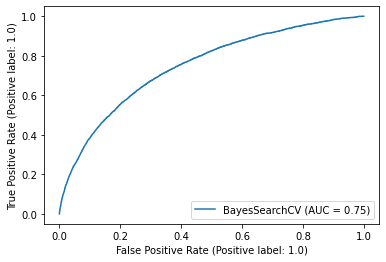

In [31]:
for keys in rfr_train.best_params_:
    print(keys,rfr_train.best_params_[keys])
RocCurveDisplay.from_estimator(rfr_train, X_test, Y_test)

In [32]:
tresh_min=round((rfr_train.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((rfr_train.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(rfr_train))


interactive(children=(IntSlider(value=37, description='tresh', max=73, min=2), Output()), _dom_classes=('widge…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 20
Le reccall score sur le validation set est :  0.6717785301732723
Le precision score sur le validation set est :  0.16683153625482244
Le score F1 sur le validation set est :  0.4184655848344995
Le score roc_auc sur le validation set est :  0.6867683217605618
[[39636 16845]
 [ 1648  3373]]

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     56481
         1.0       0.17      0.67      0.27      5021

    accuracy                           0.70     61502
   macro avg       0.56      0.69      0.54     61502
weighted avg       0.90      0.70      0.77     61502



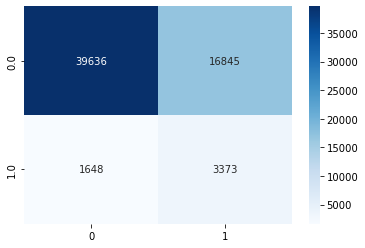

In [33]:
best_threshold(rfr_train)

## SMOTE

In [34]:
del param_rfr['class_weight']
rfr_res = grid_pipe(model_rfr,param_rfr,niter=25)
rfr_train_res = rfr_res.fit(X_res,y_res)
print(rfr_train_res.score(X_test,Y_test))
#plot_search_results(rfr_train_res, title="Decision rfr")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=  49.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=  43.7s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=  43.6s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=  43.0s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=  43.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time= 1.8min
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time= 1.8min
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_sa

[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time= 8.9min
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time= 9.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time= 6.9min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time= 6.4min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time= 6.5min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time= 6.4min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time= 6.2min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=15, max_featu

bootstrap False
max_depth 50
max_features log2
min_samples_leaf 1
min_samples_split 2


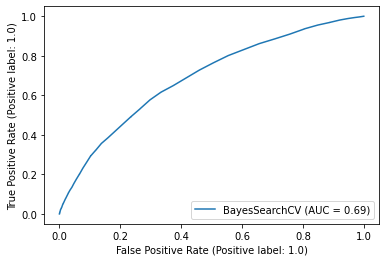

In [35]:
for keys in rfr_train_res.best_params_:
    print(keys,rfr_train_res.best_params_[keys])
RocCurveDisplay.from_estimator(rfr_train_res, X_test, Y_test)

In [36]:
tresh_min=round((rfr_train_res.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((rfr_train_res.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(rfr_train_res))


interactive(children=(IntSlider(value=46, description='tresh', max=91, min=1), Output()), _dom_classes=('widge…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 19
Le reccall score sur le validation set est :  0.614618601872137
Le precision score sur le validation set est :  0.14131977835783305
Le score F1 sur le validation set est :  0.3680732806946399
Le score roc_auc sur le validation set est :  0.6413154268899292
[[37730 18751]
 [ 1935  3086]]

              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     56481
         1.0       0.14      0.61      0.23      5021

    accuracy                           0.66     61502
   macro avg       0.55      0.64      0.51     61502
weighted avg       0.89      0.66      0.74     61502



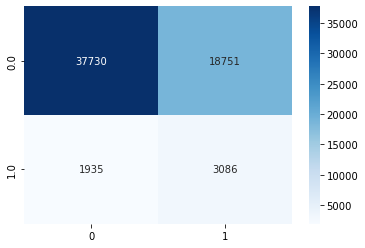

In [37]:
best_threshold(rfr_train_res)

# XGboost

## Class_weight

In [38]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_xgb = {'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'gamma': [0, 0.25, 0.5, 1.0],
             'max_depth': [6, 10, 15, 20],
             'min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'n_estimators': [25, 50, 100],
             'class_weight' : [HashableDict({0: w}) for w in [0, 0.1, 0.2, 0.4, 0.6, 1]]}



model_xgb=xgb.XGBClassifier(use_label_encoder=False)

xgb_mdl=grid_pipe(model_xgb,param_xgb)
xgb_train=xgb_mdl.fit(X_train,Y_train)
xgb_train.score(X_test,Y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[06:09:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.4}, gamma=0.25, learning_rate=0.2, max_depth=10, min_child_weight=3.0, n_estimators=100; total time= 1.7min
[06:10:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an

[CV] END class_weight={0: 0.2}, gamma=1.0, learning_rate=0.1, max_depth=15, min_child_weight=7.0, n_estimators=50; total time= 1.4min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[06:32:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.2}, gamma=0.25, learning_rate=0.1, max_depth=6, min_child_weight=5.0, n_estimators=50; total time=  32.7s
[06:33:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then be

[CV] END class_weight={0: 0.4}, gamma=1.0, learning_rate=0.01, max_depth=10, min_child_weight=1.0, n_estimators=25; total time=  29.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[06:45:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.6}, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=0.5, n_estimators=50; total time= 1.6min
[06:47:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then b

[CV] END class_weight={0: 0.6}, gamma=1.0, learning_rate=0.001, max_depth=10, min_child_weight=3.0, n_estimators=25; total time=  29.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[06:57:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.4}, gamma=0.25, learning_rate=0.1, max_depth=15, min_child_weight=1.0, n_estimators=50; total time= 1.6min
[06:59:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then

[CV] END class_weight={0: 0.2}, gamma=0.25, learning_rate=0.1, max_depth=6, min_child_weight=5.0, n_estimators=100; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[07:14:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 1}, gamma=0.5, learning_rate=0.2, max_depth=6, min_child_weight=7.0, n_estimators=50; total time=  32.5s
[07:14:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then bein

[CV] END class_weight={0: 0}, gamma=0.25, learning_rate=3.0, max_depth=15, min_child_weight=5.0, n_estimators=25; total time=  14.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[07:25:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 1}, gamma=1.0, learning_rate=0.001, max_depth=15, min_child_weight=1.0, n_estimators=100; total time= 3.0min
[07:28:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then be

[CV] END class_weight={0: 1}, gamma=1.0, learning_rate=0.2, max_depth=15, min_child_weight=7.0, n_estimators=25; total time=  44.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[07:50:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.4}, gamma=1.0, learning_rate=3.0, max_depth=20, min_child_weight=3.0, n_estimators=50; total time=  21.5s
[07:50:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then bein

[CV] END class_weight={0: 0.4}, gamma=0.5, learning_rate=3.0, max_depth=10, min_child_weight=5.0, n_estimators=50; total time=  13.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[08:03:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.1}, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=7.0, n_estimators=100; total time= 1.7min
[08:05:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then b

[CV] END class_weight={0: 0.4}, gamma=0.25, learning_rate=0.2, max_depth=6, min_child_weight=0.5, n_estimators=25; total time=  17.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[08:19:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.1}, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=7.0, n_estimators=100; total time= 1.0min
[08:20:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then be

[CV] END class_weight={0: 0.2}, gamma=0.5, learning_rate=0.2, max_depth=6, min_child_weight=10.0, n_estimators=100; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[08:37:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0}, gamma=0.25, learning_rate=0.2, max_depth=6, min_child_weight=7.0, n_estimators=100; total time= 1.0min
[08:38:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then be

[CV] END class_weight={0: 1}, gamma=0.5, learning_rate=0.2, max_depth=6, min_child_weight=1.0, n_estimators=100; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[09:07:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 1}, gamma=0.5, learning_rate=0.2, max_depth=6, min_child_weight=3.0, n_estimators=100; total time= 1.0min
[09:08:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being 

[CV] END class_weight={0: 0.2}, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=0.5, n_estimators=100; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[09:19:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.1}, gamma=0.25, learning_rate=0.001, max_depth=20, min_child_weight=10.0, n_estimators=50; total time= 1.5min
[09:20:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  the

[CV] END class_weight={0: 0.1}, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=7.0, n_estimators=100; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[09:37:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0}, gamma=1.0, learning_rate=0.1, max_depth=6, min_child_weight=10.0, n_estimators=100; total time= 1.0min
[09:38:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then be

[CV] END class_weight={0: 1}, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5.0, n_estimators=100; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[09:57:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0}, gamma=0.5, learning_rate=0.2, max_depth=6, min_child_weight=0.5, n_estimators=50; total time=  32.7s
[09:58:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being m

[CV] END class_weight={0: 0.6}, gamma=0.25, learning_rate=0.01, max_depth=20, min_child_weight=0.5, n_estimators=25; total time= 1.2min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[10:11:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.2}, gamma=1.0, learning_rate=0.1, max_depth=6, min_child_weight=7.0, n_estimators=100; total time= 1.1min
[10:12:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then 

[CV] END class_weight={0: 0}, gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=3.0, n_estimators=100; total time= 3.9min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[10:39:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0}, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=7.0, n_estimators=100; total time= 1.0min
[10:40:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then bei

[CV] END class_weight={0: 0.6}, gamma=0.25, learning_rate=0.01, max_depth=10, min_child_weight=0.5, n_estimators=100; total time= 1.9min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[11:00:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END class_weight={0: 0.6}, gamma=0.25, learning_rate=0.1, max_depth=20, min_child_weight=3.0, n_estimators=100; total time= 4.0min
[11:04:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  th

0.7735315555617523

In [39]:
#plot_search_results(xgb_train, title="Decision Tree",random=True)

class_weight {0: 0.1}
gamma 0.5
learning_rate 0.1
max_depth 6
min_child_weight 7.0
n_estimators 100


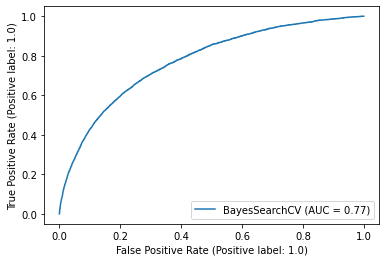

In [40]:
for keys in xgb_train.best_params_:
    print(keys,xgb_train.best_params_[keys])
RocCurveDisplay.from_estimator(xgb_train, X_test, Y_test)

In [41]:
tresh_min=round((xgb_train.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((xgb_train.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(xgb_train))


interactive(children=(IntSlider(value=38, description='tresh', max=76, min=1), Output()), _dom_classes=('widge…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 9
Le reccall score sur le validation set est :  0.6550487950607449
Le precision score sur le validation set est :  0.19066666666666668
Le score F1 sur le validation set est :  0.44048320565704185
Le score roc_auc sur le validation set est :  0.7039341636464115
[[42520 13961]
 [ 1732  3289]]

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84     56481
         1.0       0.19      0.66      0.30      5021

    accuracy                           0.74     61502
   macro avg       0.58      0.70      0.57     61502
weighted avg       0.90      0.74      0.80     61502



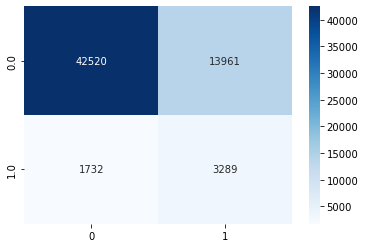

In [42]:
best_threshold(xgb_train)

## SMOTE

In [43]:
del param_xgb['class_weight']
xgb_res = grid_pipe(model_xgb,param_xgb)
xgb_train_res = xgb_res.fit(X_res,y_res)
xgb_train_res.score(X_test,Y_test)
#plot_search_results(xgb_train_res, title="Decision Tree")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.25, learning_rate=0.0, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 6.1min
[CV] END gamma=0.25, learning_rate=0.0, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 6.4min
[CV] END gamma=0.25, learning_rate=0.0, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 5.6min
[CV] END gamma=0.25, learning_rate=0.0, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 5.4min
[CV] END gamma=0.25, learning_rate=0.0, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 5.6min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=0.5, n_estimators=25; total time= 2.7min
[CV] END gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=0.5, n_estimators=25; total time= 2.8min
[CV] END gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=0.5, n_estimators=25; to

[CV] END gamma=0.0, learning_rate=0.01, max_depth=10, min_child_weight=7.0, n_estimators=100; total time= 4.4min
[CV] END gamma=0.0, learning_rate=0.01, max_depth=10, min_child_weight=7.0, n_estimators=100; total time= 4.4min
[CV] END gamma=0.0, learning_rate=0.01, max_depth=10, min_child_weight=7.0, n_estimators=100; total time= 4.5min
[CV] END gamma=0.0, learning_rate=0.01, max_depth=10, min_child_weight=7.0, n_estimators=100; total time= 4.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=1.0, n_estimators=25; total time=  50.5s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=1.0, n_estimators=25; total time=  48.2s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=1.0, n_estimators=25; total time=  50.2s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=1.0, n_estimators=25; total time=  49.6s
[CV] END gamma=0.5, learning_rate=0.01, max_d

[CV] END gamma=0.25, learning_rate=0.2, max_depth=20, min_child_weight=0.5, n_estimators=50; total time= 5.0min
[CV] END gamma=0.25, learning_rate=0.2, max_depth=20, min_child_weight=0.5, n_estimators=50; total time= 5.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50; total time= 2.3min
[CV] END gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50; total time= 2.3min
[CV] END gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50; total time= 2.3min
[CV] END gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50; total time= 2.3min
[CV] END gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50; total time= 2.4min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.0, learning_rate=0.01, max_depth=10, min_child_weight=0.5, n_estimators=50; total time

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.5, learning_rate=0.2, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 3.8min
[CV] END gamma=0.5, learning_rate=0.2, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 4.8min
[CV] END gamma=0.5, learning_rate=0.2, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 4.9min
[CV] END gamma=0.5, learning_rate=0.2, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 4.9min
[CV] END gamma=0.5, learning_rate=0.2, max_depth=20, min_child_weight=1.0, n_estimators=50; total time= 4.9min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=0.25, learning_rate=0.2, max_depth=20, min_child_weight=0.5, n_estimators=100; total time= 6.3min
[CV] END gamma=0.25, learning_rate=0.2, max_depth=20, min_child_weight=0.5, n_estimators=100; total time= 9.0min
[CV] END gamma=0.25, learning_rate=0.2, max_depth=20, min_child_weight=0.5, n_estimators=100; total t

0.7365551837255994

gamma 0.5
learning_rate 0.1
max_depth 20
min_child_weight 1.0
n_estimators 50


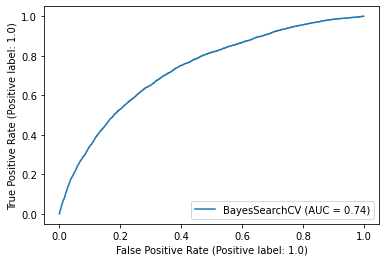

In [44]:
for keys in xgb_train_res.best_params_:
    print(keys,xgb_train_res.best_params_[keys])
RocCurveDisplay.from_estimator(xgb_train_res, X_test, Y_test)

In [45]:
tresh_min=round((xgb_train_res.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((xgb_train_res.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(xgb_train_res))


interactive(children=(IntSlider(value=45, description='tresh', max=89, min=1), Output()), _dom_classes=('widge…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 4
Le reccall score sur le validation set est :  0.7207727544313882
Le precision score sur le validation set est :  0.14841090834529425
Le score F1 sur le validation set est :  0.40691268074388903
Le score roc_auc sur le validation set est :  0.6765546461911017
[[35715 20766]
 [ 1402  3619]]

              precision    recall  f1-score   support

         0.0       0.96      0.63      0.76     56481
         1.0       0.15      0.72      0.25      5021

    accuracy                           0.64     61502
   macro avg       0.56      0.68      0.50     61502
weighted avg       0.90      0.64      0.72     61502



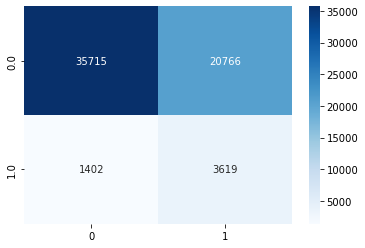

In [46]:
best_threshold(xgb_train_res)

# LGBM

## Class_weight

In [28]:
from lightgbm import LGBMClassifier

In [48]:
param_lgbm = {
    'learning_rate': [0.005, 0.01,0.1,0.2],
    'n_estimators': [50,100,150],
    'num_leaves': [32,38,44,52], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.25,0.50, 0.75, 1],
    'subsample' : [0.5,0.75,1],
    'reg_alpha' : [0,0.5,1,1.2],
    'reg_lambda' : [0,0.5,1,1.2],
    'class_weight' : [HashableDict({0: w}) for w in [0, 0.1, 0.2, 0.4, 0.6, 1]],
    }

In [49]:
model_lgbm=LGBMClassifier()
lgbm=grid_pipe(model_lgbm,param_lgbm)
lgbm_train=lgbm.fit(X_train,Y_train)
lgbm.score(X_test,Y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=dart, class_weight={0: 0.1}, colsample_bytree=0.75, learning_rate=0.005, max_bin=293, n_estimators=100, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.75; total time=  15.7s
[CV] END boosting_type=dart, class_weight={0: 0.1}, colsample_bytree=0.75, learning_rate=0.005, max_bin=293, n_estimators=100, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.75; total time=  13.0s
[CV] END boosting_type=dart, class_weight={0: 0.1}, colsample_bytree=0.75, learning_rate=0.005, max_bin=293, n_estimators=100, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.75; total time=  12.9s
[CV] END boosting_type=dart, class_weight={0: 0.1}, colsample_bytree=0.75, learning_rate=0.005, max_bin=293, n_estimators=100, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, 

[CV] END boosting_type=gbdt, class_weight={0: 0.4}, colsample_bytree=0.25, learning_rate=0.1, max_bin=457, n_estimators=100, num_leaves=44, objective=binary, random_state=500, reg_alpha=1.2, reg_lambda=1.0, subsample=0.5; total time=   6.8s
[CV] END boosting_type=gbdt, class_weight={0: 0.4}, colsample_bytree=0.25, learning_rate=0.1, max_bin=457, n_estimators=100, num_leaves=44, objective=binary, random_state=500, reg_alpha=1.2, reg_lambda=1.0, subsample=0.5; total time=   6.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=gbdt, class_weight={0: 0.2}, colsample_bytree=0.5, learning_rate=0.1, max_bin=420, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.75; total time=   6.8s
[CV] END boosting_type=gbdt, class_weight={0: 0.2}, colsample_bytree=0.5, learning_rate=0.1, max_bin=420, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.75

[CV] END boosting_type=gbdt, class_weight={0: 0}, colsample_bytree=1.0, learning_rate=0.1, max_bin=255, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=   4.7s
[CV] END boosting_type=gbdt, class_weight={0: 0}, colsample_bytree=1.0, learning_rate=0.1, max_bin=255, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=   4.7s
[CV] END boosting_type=gbdt, class_weight={0: 0}, colsample_bytree=1.0, learning_rate=0.1, max_bin=255, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=   4.7s
[CV] END boosting_type=gbdt, class_weight={0: 0}, colsample_bytree=1.0, learning_rate=0.1, max_bin=255, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=   4.8s
Fitting 5 folds for each of 1 candidates, totall

[CV] END boosting_type=gbdt, class_weight={0: 0.4}, colsample_bytree=1.0, learning_rate=0.005, max_bin=265, n_estimators=100, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.5, subsample=1.0; total time=  13.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=dart, class_weight={0: 1}, colsample_bytree=1.0, learning_rate=0.005, max_bin=450, n_estimators=150, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.5; total time=  17.2s
[CV] END boosting_type=dart, class_weight={0: 1}, colsample_bytree=1.0, learning_rate=0.005, max_bin=450, n_estimators=150, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.5; total time=  17.0s
[CV] END boosting_type=dart, class_weight={0: 1}, colsample_bytree=1.0, learning_rate=0.005, max_bin=450, n_estimators=150, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.5

[CV] END boosting_type=gbdt, class_weight={0: 0.6}, colsample_bytree=0.25, learning_rate=0.2, max_bin=255, n_estimators=50, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=   5.3s
[CV] END boosting_type=gbdt, class_weight={0: 0.6}, colsample_bytree=0.25, learning_rate=0.2, max_bin=255, n_estimators=50, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=   5.3s
[CV] END boosting_type=gbdt, class_weight={0: 0.6}, colsample_bytree=0.25, learning_rate=0.2, max_bin=255, n_estimators=50, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=   4.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=dart, class_weight={0: 0.4}, colsample_bytree=0.25, learning_rate=0.2, max_bin=510, n_estimators=150, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0;

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=gbdt, class_weight={0: 0.2}, colsample_bytree=0.25, learning_rate=0.2, max_bin=255, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.0, subsample=1.0; total time=   5.4s
[CV] END boosting_type=gbdt, class_weight={0: 0.2}, colsample_bytree=0.25, learning_rate=0.2, max_bin=255, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.0, subsample=1.0; total time=   6.7s
[CV] END boosting_type=gbdt, class_weight={0: 0.2}, colsample_bytree=0.25, learning_rate=0.2, max_bin=255, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.0, subsample=1.0; total time=   5.5s
[CV] END boosting_type=gbdt, class_weight={0: 0.2}, colsample_bytree=0.25, learning_rate=0.2, max_bin=255, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.0, subsample=1

[CV] END boosting_type=dart, class_weight={0: 0.1}, colsample_bytree=1.0, learning_rate=0.2, max_bin=324, n_estimators=150, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.0, subsample=0.5; total time=  16.0s
[CV] END boosting_type=dart, class_weight={0: 0.1}, colsample_bytree=1.0, learning_rate=0.2, max_bin=324, n_estimators=150, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.0, subsample=0.5; total time=  16.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=gbdt, class_weight={0: 0.1}, colsample_bytree=0.25, learning_rate=0.2, max_bin=304, n_estimators=150, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=   6.3s
[CV] END boosting_type=gbdt, class_weight={0: 0.1}, colsample_bytree=0.25, learning_rate=0.2, max_bin=304, n_estimators=150, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0

[CV] END boosting_type=gbdt, class_weight={0: 0.1}, colsample_bytree=1.0, learning_rate=0.2, max_bin=510, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0; total time=   9.0s
[CV] END boosting_type=gbdt, class_weight={0: 0.1}, colsample_bytree=1.0, learning_rate=0.2, max_bin=510, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0; total time=   8.9s
[CV] END boosting_type=gbdt, class_weight={0: 0.1}, colsample_bytree=1.0, learning_rate=0.2, max_bin=510, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0; total time=   8.8s
[CV] END boosting_type=gbdt, class_weight={0: 0.1}, colsample_bytree=1.0, learning_rate=0.2, max_bin=510, n_estimators=100, num_leaves=32, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0; total time=   9.2s
Fitting 5 folds for each of 1 candidates

0.7785545499186872

In [50]:
#plot_search_results(lgbm_train, title="Decision Tree",random=True)

boosting_type gbdt
class_weight {0: 0.4}
colsample_bytree 0.25
learning_rate 0.1
max_bin 438
n_estimators 150
num_leaves 32
objective binary
random_state 500
reg_alpha 1.0
reg_lambda 1.0
subsample 0.5


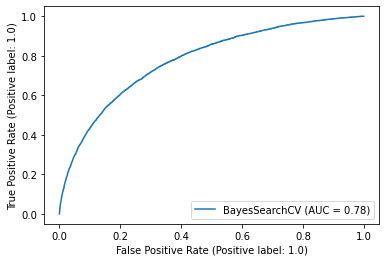

In [51]:
for keys in lgbm_train.best_params_:
    print(keys,lgbm_train.best_params_[keys])
RocCurveDisplay.from_estimator(lgbm_train, X_test, Y_test)

In [52]:
tresh_min=round((lgbm_train.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((lgbm_train.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(lgbm_train))


interactive(children=(IntSlider(value=43, description='tresh', max=85, min=2), Output()), _dom_classes=('widge…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 19
Le reccall score sur le validation set est :  0.6675960963951404
Le precision score sur le validation set est :  0.1906603719924919
Le score F1 sur le validation set est :  0.444975441391212
Le score roc_auc sur le validation set est :  0.7078353350728027
[[42252 14229]
 [ 1669  3352]]

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84     56481
         1.0       0.19      0.67      0.30      5021

    accuracy                           0.74     61502
   macro avg       0.58      0.71      0.57     61502
weighted avg       0.90      0.74      0.80     61502



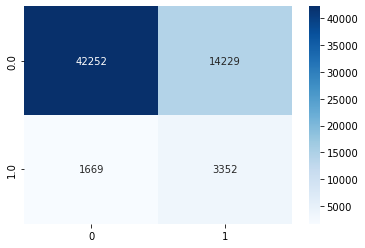

In [53]:
best_threshold(lgbm_train)

## SMOTE

In [54]:
del param_lgbm['class_weight']
lgbm_res = grid_pipe(model_lgbm,param_lgbm)
lgbm_train_res = lgbm_res.fit(X_res,y_res)
lgbm_train_res.score(X_test,Y_test)
#plot_search_results(lgbm_train_res, title="Decision Tree")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=gbdt, colsample_bytree=0.5, learning_rate=0.2, max_bin=418, n_estimators=50, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=  12.3s
[CV] END boosting_type=gbdt, colsample_bytree=0.5, learning_rate=0.2, max_bin=418, n_estimators=50, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=  11.9s
[CV] END boosting_type=gbdt, colsample_bytree=0.5, learning_rate=0.2, max_bin=418, n_estimators=50, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=  11.6s
[CV] END boosting_type=gbdt, colsample_bytree=0.5, learning_rate=0.2, max_bin=418, n_estimators=50, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=  11.8s
[CV] END boosting_type=gbdt, colsample_bytree=0.5, learning_rate=0.2, max_bin

[CV] END boosting_type=dart, colsample_bytree=0.75, learning_rate=0.1, max_bin=509, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=  38.2s
[CV] END boosting_type=dart, colsample_bytree=0.75, learning_rate=0.1, max_bin=509, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=  37.9s
[CV] END boosting_type=dart, colsample_bytree=0.75, learning_rate=0.1, max_bin=509, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=  38.6s
[CV] END boosting_type=dart, colsample_bytree=0.75, learning_rate=0.1, max_bin=509, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.5, reg_lambda=1.2, subsample=0.5; total time=  37.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=gbdt, colsample_bytree=1.0, learning_rate=0.01

[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.005, max_bin=510, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=1.2, reg_lambda=1.2, subsample=0.5; total time=  22.2s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.005, max_bin=510, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=1.2, reg_lambda=1.2, subsample=0.5; total time=  21.1s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.005, max_bin=510, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=1.2, reg_lambda=1.2, subsample=0.5; total time=  21.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=gbdt, colsample_bytree=1.0, learning_rate=0.1, max_bin=510, n_estimators=50, num_leaves=38, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  14.6s
[CV] END boosting_type=gbdt, colsample_bytree=1.0, learning_rate=

[CV] END boosting_type=gbdt, colsample_bytree=0.5, learning_rate=0.1, max_bin=510, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=1.0, reg_lambda=0.0, subsample=1.0; total time=  13.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.5, learning_rate=0.1, max_bin=510, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=1.0, reg_lambda=0.0, subsample=1.0; total time=  13.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=gbdt, colsample_bytree=0.75, learning_rate=0.1, max_bin=510, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  14.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.75, learning_rate=0.1, max_bin=510, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  14.9s
[CV] END boosting_type=gbdt, colsample_bytree=0.75, learning_rate=0.1, max_

[CV] END boosting_type=gbdt, colsample_bytree=0.25, learning_rate=0.01, max_bin=490, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=1.2, reg_lambda=0.5, subsample=1.0; total time=   9.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.1, max_bin=510, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  20.4s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.1, max_bin=510, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  20.8s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.1, max_bin=510, n_estimators=150, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  20.7s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.1

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.2, max_bin=261, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.5, subsample=0.5; total time=   9.4s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.2, max_bin=261, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.5, subsample=0.5; total time=   9.8s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.2, max_bin=261, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.5, subsample=0.5; total time=  11.0s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.2, max_bin=261, n_estimators=50, num_leaves=52, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=0.5, subsample=0.5; total time=   9.3s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.2, ma

[CV] END boosting_type=gbdt, colsample_bytree=0.25, learning_rate=0.01, max_bin=269, n_estimators=100, num_leaves=44, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  11.8s
[CV] END boosting_type=gbdt, colsample_bytree=0.25, learning_rate=0.01, max_bin=269, n_estimators=100, num_leaves=44, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  11.6s
[CV] END boosting_type=gbdt, colsample_bytree=0.25, learning_rate=0.01, max_bin=269, n_estimators=100, num_leaves=44, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  13.9s
[CV] END boosting_type=gbdt, colsample_bytree=0.25, learning_rate=0.01, max_bin=269, n_estimators=100, num_leaves=44, objective=binary, random_state=500, reg_alpha=0.0, reg_lambda=1.2, subsample=1.0; total time=  11.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate

0.7170393157012356

boosting_type dart
colsample_bytree 0.25
learning_rate 0.1
max_bin 304
n_estimators 150
num_leaves 32
objective binary
random_state 500
reg_alpha 0.0
reg_lambda 1.0
subsample 1.0


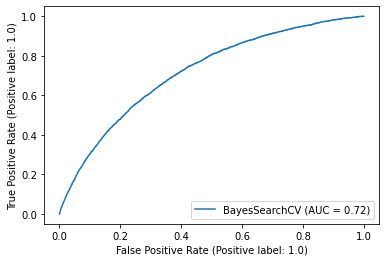

In [55]:
for keys in lgbm_train_res.best_params_:
    print(keys,lgbm_train_res.best_params_[keys])
RocCurveDisplay.from_estimator(lgbm_train_res, X_test, Y_test)

In [56]:
tresh_min=round((lgbm_train_res.predict_proba(X_test)[:,1].min()*100)+1)
tresh_max=round((lgbm_train_res.predict_proba(X_test)[:,1].max()*100)-2)
interact(metrique_plot,tresh=(tresh_min,tresh_max),model=fixed(lgbm_train_res))

interactive(children=(IntSlider(value=33, description='tresh', max=61, min=5), Output()), _dom_classes=('widge…

<function __main__.metrique_plot(model, tresh)>

Le meilleur treshold pour ce modèle est : 14
Le reccall score sur le validation set est :  0.741485759808803
Le precision score sur le validation set est :  0.13561359414271665
Le score F1 sur le validation set est :  0.3915897090687255
Le score roc_auc sur le validation set est :  0.6606722366792461
[[32751 23730]
 [ 1298  3723]]

              precision    recall  f1-score   support

         0.0       0.96      0.58      0.72     56481
         1.0       0.14      0.74      0.23      5021

    accuracy                           0.59     61502
   macro avg       0.55      0.66      0.48     61502
weighted avg       0.89      0.59      0.68     61502



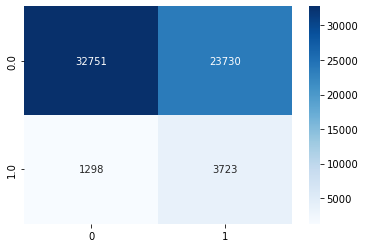

In [57]:
best_threshold(lgbm_train_res)


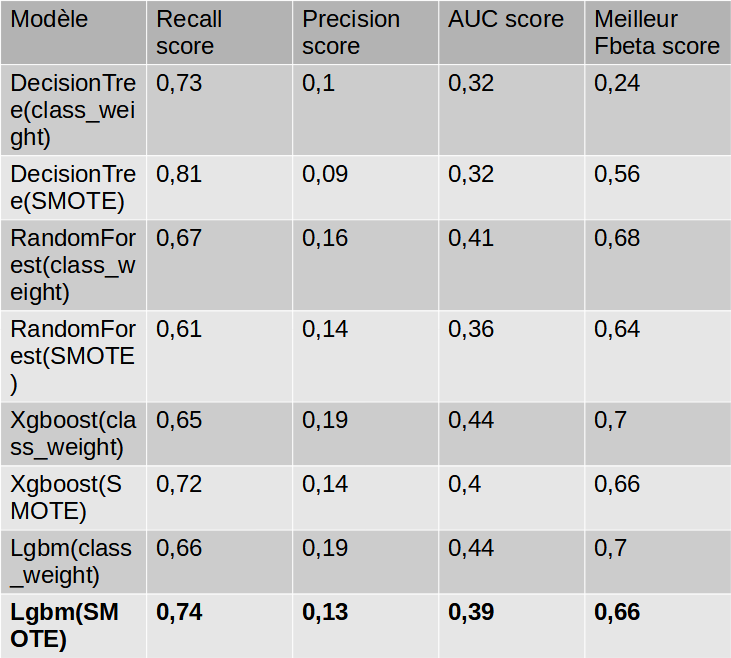

Les modèles XGBoost offre clairement les meilleur resultats avec quelques différence au niveau de l'équilibre entre le reccall score et le precision score

On aura tendance a préferer le modèle Lgbm qui est legerement plus rapide a entrainer et qui possède le meilleur recall_score

On remarque aussi que les modèles utilisant le paramètre 'class_weight' offre de meilleur résultats , cela pourrait du a des approximation dans le traitement des données qui serait amplifié par l'oversampling de smote()

Cependant pour la suite du projet et les besoins d'évaluations nous utiliserins une pipeline comprenant un traitement des données au préalable avec smote

# Optimisation du modèle

Pour tenter d'optimiser les résultats et le temps de prédiction du modèle nous allons voir si il est possible de réduire le nombre de features dans nos données.
Pour cela nous effectuerons une recherche de features importances par permutations et on retireras successivement le 50 features les moins importantes, nous regarderons ensuite l'evolution du meilleur fbeta score pour ces modèles

## Fonction

In [26]:


def best_threshold_imp(model,importance=X.columns):
    best_thresh=0
    best_thresh_value=0
    thresh_min=round((model.predict_proba(X_test[importance])[:,1].min()*100)+1)
    thresh_max=round((model.predict_proba(X_test[importance])[:,1].max()*100)-1)

    for item in range(thresh_min,thresh_max):
        w = lambda x : 0 if x < (item/100) else 1
        y_pred=np.array([w(xi) for xi in model.predict_proba(X_test[importance])[:,1]])
        score_f1=fbeta_score(Y_test,y_pred,beta=2)
        if score_f1 > best_thresh_value:
            best_thresh=item
            best_thresh_value=score_f1
    print('Le meilleur treshold pour ce modèle est :', best_thresh)
    print('Le score fbeta pour ce threshold est :' , best_thresh_value)
    return best_thresh
    
    
def metrique_plot_imp(model,thresh,importance=X.columns):  

    
    w=lambda x : 0 if x < (thresh/100) else 1
    y_pred=np.array([w(xi) for xi in model.predict_proba(X_test[importance])[:,1]])
    
    score_auc=roc_auc_score(y_pred,Y_test,average='macro')
    
    print("Le score roc_auc sur le validation set est : " , score_auc)
    
    metrics.confusion_matrix(Y_test, y_pred)

    conf_mat = metrics.confusion_matrix(Y_test, y_pred)
    print(conf_mat)
    print()
    print(metrics.classification_report(Y_test, y_pred))


    df_cm = pd.DataFrame(conf_mat, index = [label for label in set(Y_test)],
                      columns = [i for i in "01"])
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')
    
def mdl_importance(n_features = 506):
    importance=feature_importance_df['features'].head(n_features)
    clf_imp=pipeline.fit(X_train[importance],Y_train)
    RocCurveDisplay.from_estimator(clf_imp, X_test[importance], Y_test)
    thresh=best_threshold_imp(clf_imp,importance)
    metrique_plot_imp(clf_imp,thresh,importance)

Le meilleur treshold pour ce modèle est : 9
Le score fbeta pour ce threshold est : 0.42718055800145915
Le score roc_auc sur le validation set est :  0.5669256919817051
[[40212 16269]
 [ 1625  3396]]

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     56481
         1.0       0.17      0.68      0.28      5021

    accuracy                           0.71     61502
   macro avg       0.57      0.69      0.55     61502
weighted avg       0.90      0.71      0.77     61502



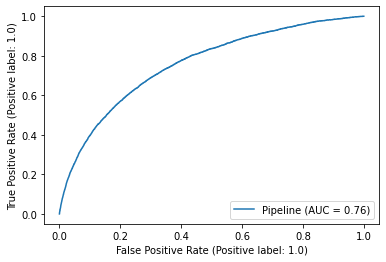

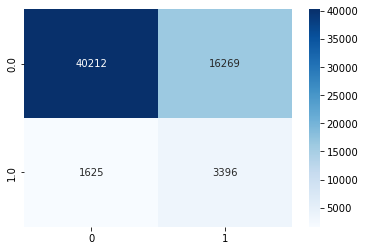

In [29]:

model=LGBMClassifier(boosting_type= 'gbdt',
                    colsample_bytree= 0.25,
                    learning_rate= 0.1,
                    max_bin= 304,
                    n_estimators= 150,
                    num_leaves= 32,
                    objective ='binary',
                    random_state= 500,
                    reg_alpha= 0,
                    reg_lambda= 1,
                    subsample= 1,
                    )
steps = [('over', SMOTE(random_state=42)), ('model', model)]
pipeline = Pipeline(steps=steps)
clf=pipeline.fit(X_train,Y_train)
RocCurveDisplay.from_estimator(clf, X_test, Y_test)
thresh=best_threshold_imp(clf)
metrique_plot_imp(clf,thresh)

Affichage des features les plus importantes

<AxesSubplot:xlabel='importance', ylabel='features'>

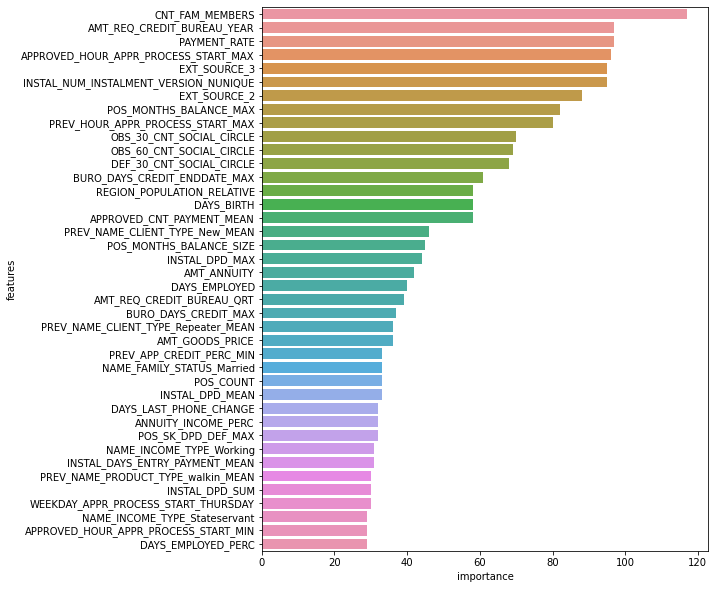

In [30]:
feature_importance_df = pd.DataFrame()
feature_importance_df['importance']=clf.named_steps['model'].feature_importances_
feature_importance_df['features']=clf.feature_names_in_
feature_importance_df.sort_values('importance',ascending=False,inplace=True)
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y="features",data=feature_importance_df.head(40))

Le meilleur treshold pour ce modèle est : 9
Le score fbeta pour ce threshold est : 0.42497482376636453
Le score roc_auc sur le validation set est :  0.5663185414276126
[[40221 16260]
 [ 1645  3376]]

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     56481
         1.0       0.17      0.67      0.27      5021

    accuracy                           0.71     61502
   macro avg       0.57      0.69      0.55     61502
weighted avg       0.90      0.71      0.77     61502



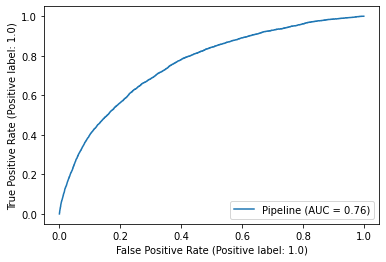

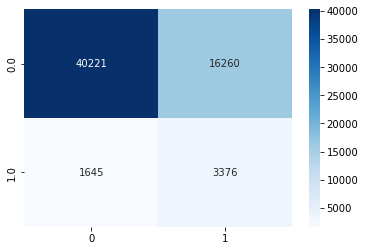

In [39]:
mdl_importance(450)

Le meilleur treshold pour ce modèle est : 10
Le score fbeta pour ce threshold est : 0.42938701117692785
Le score roc_auc sur le validation set est :  0.5724858004855499
[[42460 14021]
 [ 1817  3204]]

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84     56481
         1.0       0.19      0.64      0.29      5021

    accuracy                           0.74     61502
   macro avg       0.57      0.69      0.57     61502
weighted avg       0.90      0.74      0.80     61502



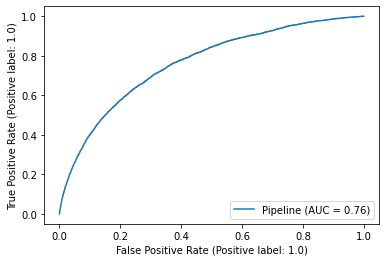

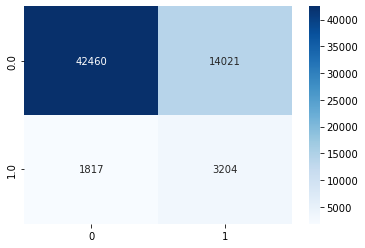

In [40]:
mdl_importance(400)

Le meilleur treshold pour ce modèle est : 10
Le score fbeta pour ce threshold est : 0.4272634791454731
Le score roc_auc sur le validation set est :  0.5717395149102228
[[42403 14078]
 [ 1829  3192]]

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84     56481
         1.0       0.18      0.64      0.29      5021

    accuracy                           0.74     61502
   macro avg       0.57      0.69      0.56     61502
weighted avg       0.90      0.74      0.80     61502



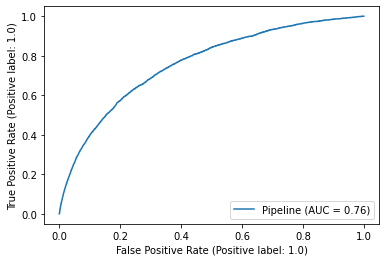

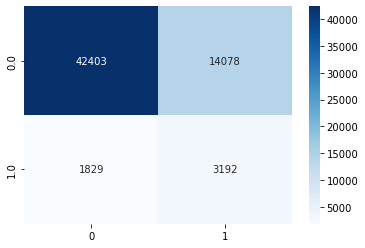

In [41]:
mdl_importance(350)

Le meilleur treshold pour ce modèle est : 8
Le score fbeta pour ce threshold est : 0.42786764880036
Le score roc_auc sur le validation set est :  0.5637215499033101
[[37957 18524]
 [ 1408  3613]]

              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79     56481
         1.0       0.16      0.72      0.27      5021

    accuracy                           0.68     61502
   macro avg       0.56      0.70      0.53     61502
weighted avg       0.90      0.68      0.75     61502



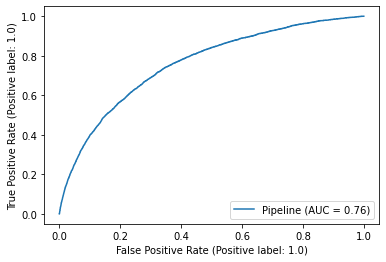

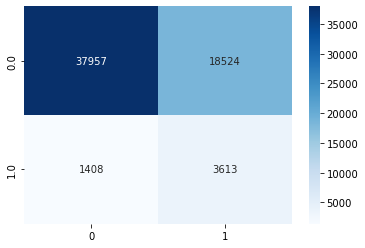

In [42]:
mdl_importance(300)

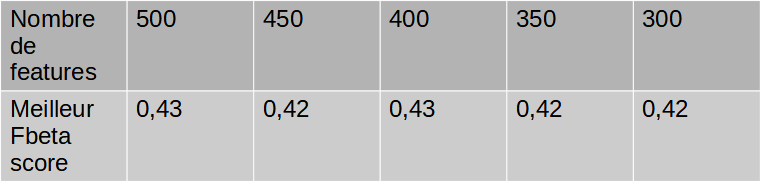

Les résultats restent similaires quelque soit le nombre de features, on gardera donc un jeu de donnée composer de 400 features pour l'entrainement du modèle qui est legerement meilleur et qui permet de réduire le nombre de donnée de 20%

# Interpétabilité local et globale du modèle

Pour l'intérprétabilité du modèle nous analyserons les features importances avec shap.
Pour l'intérprétabilité globale nous afficherons un summary plot des variables les plus importantes.
Pour l'interprétabilité locale un waterfall plot des variables les plus importantes  pour chaque client ainsi qu'un dependanceplot() pour chaque variables seront mis a dispositions sur le Dashboard

In [31]:
import joblib
importance=feature_importance_df['features'].head(400)
with open('column.npy', 'wb') as f:
    np.save(f, importance)
clf=pipeline.fit(X_train[importance],Y_train)
joblib.dump(clf, 'model_lgbm.pkl') 

['model_lgbm.pkl']

In [45]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(clf.named_steps['model'],feature_names=X.columns.tolist())
print('test')
shap_values = explainer.shap_values(X[importance])

test


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Summary plot des features les plus importantes

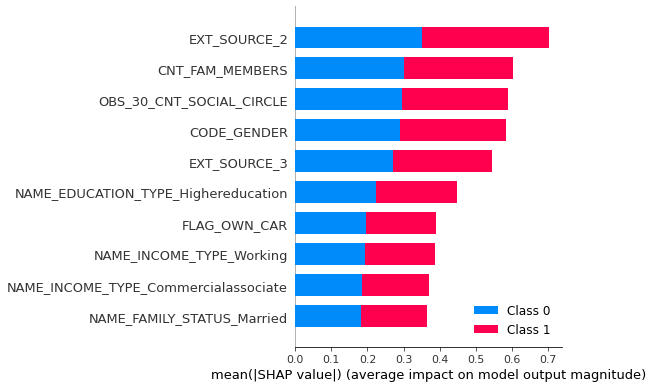

In [46]:
shap.summary_plot(shap_values, X[importance],max_display=10)

DependancePlot des features les plus importantes

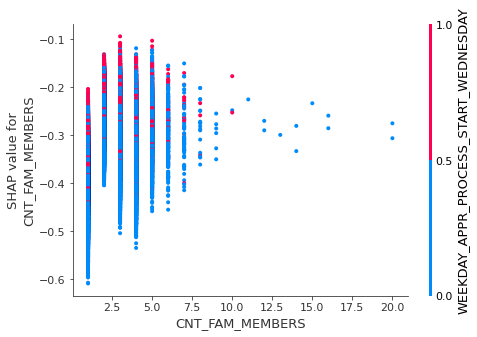

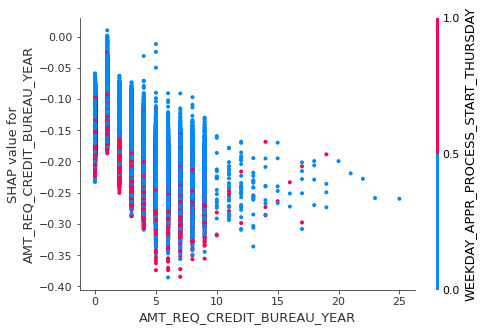

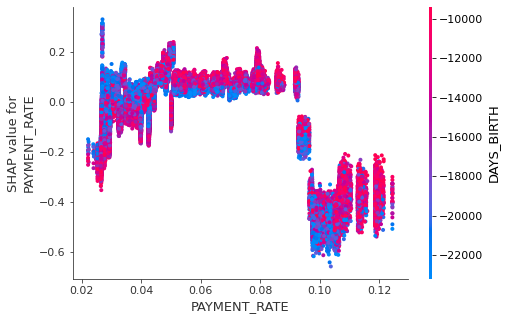

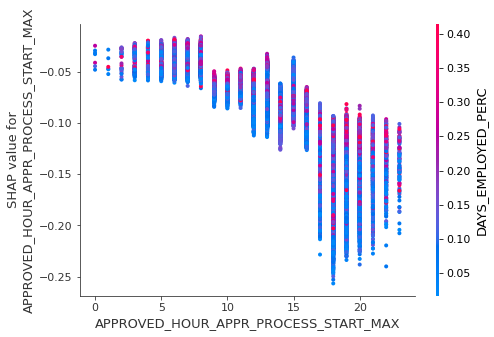

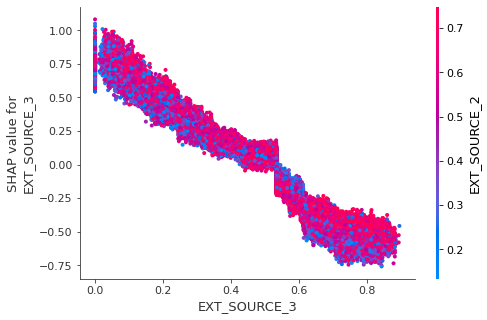

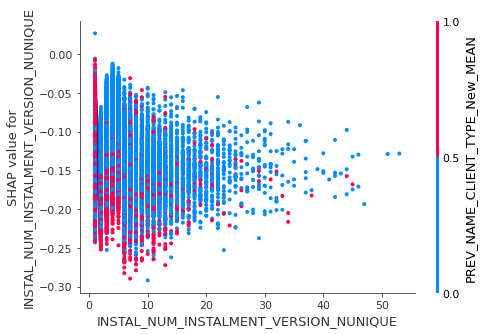

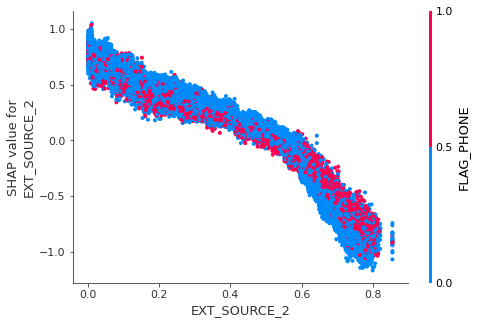

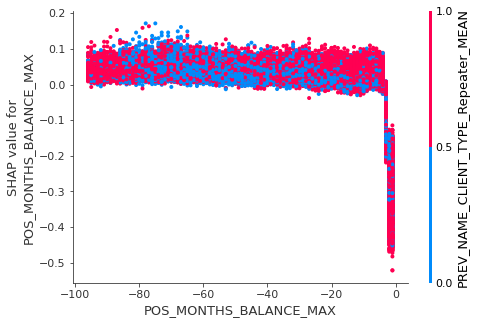

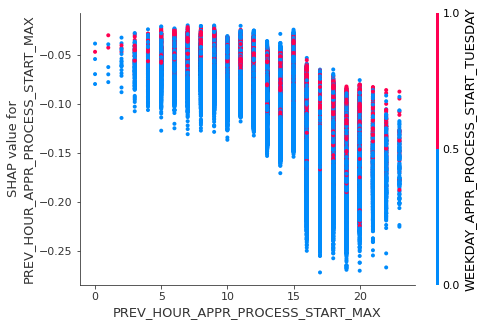

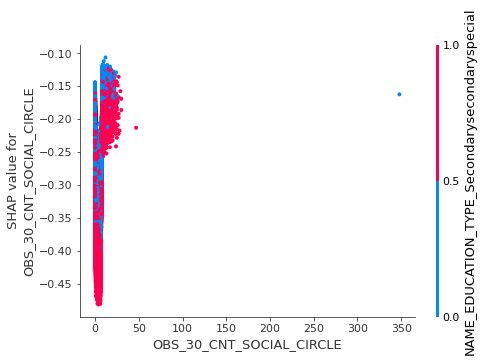

In [47]:
for name in feature_importance_df['features'].head(10):
    shap.dependence_plot(name, shap_values[1], X[importance], display_features=X)

Exemple de waterfall plot pour un client

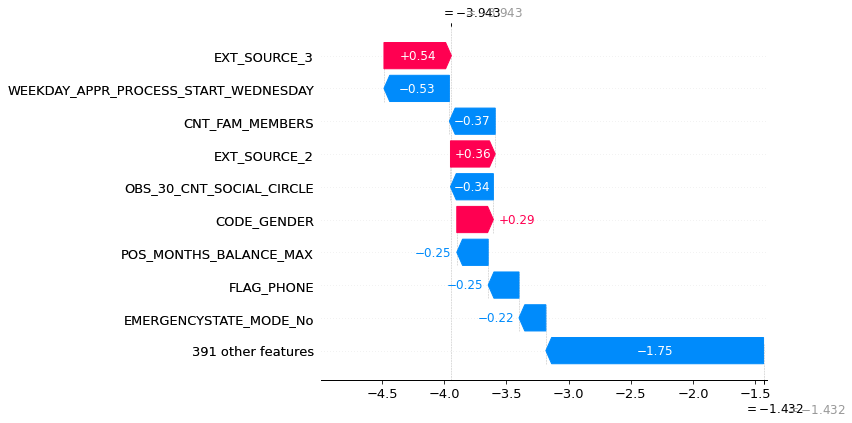

In [48]:
shap_values_explaination = shap.Explanation(shap_values[1][0,:], feature_names=X[importance].columns.tolist()) 
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0],shap_values_explaination.values,feature_names=X[importance].columns.tolist())
        